<a href="https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics/blob/master/Assignment/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import statistics

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, recall_score, precision_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

warnings.filterwarnings('ignore')
%matplotlib inline

<div>
<td>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2b/Logo_Universit%C3%A9_de_Lausanne.svg/2000px-Logo_Universit%C3%A9_de_Lausanne.svg.png" style="padding-right:10px;width:240px;float:left"/></td>
<h2 style="white-space: nowrap">Business Intelligence and Analytics Personal Assignment</h2></td>
<hr style="clear:both">
<p style="font-size:0.85em; margin:2px; text-align:justify">

</div>

# IMPORTANT

Question 1: Before starting this assignment, please indicate whether this course is worth 4.5 or 6 credits to you. Please answer truthfully, as checks will be made afterwards. This question is only intended to facilitate the calculation of final points.

> TODO: Your answer here

# Part 1: Climate Analytics - Rice vs Wheat in a Changing World

## Context

You work as a junior data analyst at SerriFleur, an international NGO focused on sustainable agriculture in the face of climate change. Your team is investigating how climate conditions and farming practices affect the yields of rice and wheat — two of the most critical staple crops globally.

You’ve just received a massive dataset from the research division: "Hydroponix.csv". Your task is to extract insights, build models, and tell a compelling story from the data. You can find the dataset here: https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/refs/heads/master/data/Hydroponix.csv

Columns Overview:

* `Year` : Year of the observation.

* `Country` : Country where the data was collected.

* `Region` : Specific region within the country.

* `Crop_Type` : Type of agricultural crop observed.

* `Average_Temperature` : Annual average temperature in degrees Celsius.

* `Total_Precipitation` : Total annual precipitation in millimeters.

* `CO2_Emissions` : CO₂ emissions in million tons.

* `Crop_Yield` : Agricultural yield in tons per hectare.

* `Extreme_Weather_Events` : Number of recorded extreme weather events.

* `Irrigation_Access` : Percentage of cultivated land with access to irrigation.

* `Pesticide_Use` : Pesticide use in kilograms per hectare.

* `Fertilizer_Use` : Fertilizer use in kilograms per hectare.

* `Soil_Health_Index` : Soil quality index (out of 100).

* `Economic_Impact` : Economic impact in million USD.

In [1]:
# Étude sur le riz et le blé face au changement climatique – SerriFleur


import pandas as pd


url = "https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/refs/heads/master/data/Hydroponix.csv"
data = pd.read_csv(url)


cultures = data[data['Crop_Type'].isin(['Rice', 'Wheat'])]


colonnes = [
    'Year', 'Country', 'Region', 'Crop_Type', 'Average_Temperature',
    'Total_Precipitation', 'CO2_Emissions', 'Crop_Yield',
    'Extreme_Weather_Events', 'Irrigation_Access',
    'Pesticide_Use', 'Fertilizer_Use', 'Soil_Health_Index',
    'Economic_Impact'
]


display(cultures.head(20))  # Pour forcer l'affichage clair

# Étape 5 : Compter combien de pays sont représentés dans les données filtrées
nb_pays = cultures['Country'].nunique()
print("### Nombre de pays étudiés (riz ou blé) :", nb_pays)






,Year,Country,Region,Crop_Type,Average_Temperature,Total_Precipitation,CO2_Emissions,Crop_Yield,Irrigation_Access,Pesticide_Use,Fertilizer_Use,Soil_Health_Index,Economic_Impact
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,84.42,27.41,65.53,67.78,796.96
7,2021,Australia,New South Wales,Rice,25.63,786.17,7.77,3.270,66.53,13.44,40.50,63.16,1367.97
8,2012,India,Punjab,Wheat,32.08,1233.10,6.10,2.990,45.87,10.09,32.54,42.31,761.89
18,1997,Brazil,Northeast,Rice,17.45,1634.32,29.55,2.754,29.84,48.57,3.21,30.18,1323.81
20,2000,Australia,New South Wales,Rice,30.08,1641.99,15.83,3.096,94.75,13.70,42.84,73.56,345.85
29,1997,Australia,Victoria,Wheat,31.67,2364.58,13.16,3.330,72.38,48.77,12.25,94.46,1244.49
34,2004,China,East,Rice,-0.50,2892.43,18.33,1.593,34.21,13.13,81.90,77.07,776.00
43,2019,Argentina,Pampas,Rice,2.33,839.77,25.67,2.016,18.40,8.92,70.37,82.21,524.89
45,2024,USA,South,Wheat,12.18,1647.58,19.10,1.872,36.61,43.15,22.46,52.18,925.79
46,1998,Brazil,South,Rice,28.86,1970.45,13.89,1.930,41.49,16.31,94.79,55.36,763.30


### Nombre de pays étudiés (riz ou blé) : 10


## Exercise 1: Data Cleaning & Preprocessing



The dataset you’ve received contains data from multiple countries, various crops, and inconsistent formatting. Your first job is to narrow the scope of your study and prepare a clean dataset that’s ready for analysis.

Your mission:

*   Filter the dataset to focus only on rice and wheat
*   Drop the regional identifiers column
*   Group the data by Country, Year and Crop_type but don't put them as index (*Hint: specific parameter of `groupby`*) and calculate the mean of each column
*   Change the type of the columns `Country` and `Crop_type`


In [85]:
# Question 2: Find the list of crop types produced by SerriFleur

data_filtrée = data[data['Crop_Type'].isin(['Rice', 'Wheat'])]

data_filtrée = data_filtrée.drop(columns=['Region'])

data_groupée = data_filtrée.groupby(['Country', 'Year', 'Crop_Type'], as_index=False).mean()

data_groupée['Country'] = data_groupée['Country'].astype('category')
data_groupée['Crop_Type'] = data_groupée['Crop_Type'].astype('category')

types_de_cultures = sorted(data['Crop_Type'].unique())
print(" Types de cultures présents dans les données de SerriFleur :")
for t in types_de_cultures:
    print("-", t)

 Types de cultures présents dans les données de SerriFleur :
- Barley
- Coffee
- Corn
- Cotton
- Fruits
- Rice
- Soybeans
- Sugarcane
- Vegetables
- Wheat


In [3]:
# Data cleaning

data_cleaned = data[data['Crop_Type'].isin(['Rice', 'Wheat'])]

data_cleaned = data_cleaned.drop(columns=['Region'])

data_cleaned = data_cleaned.groupby(['Country', 'Year', 'Crop_Type'], as_index=False).mean()

data_cleaned['Country'] = data_cleaned['Country'].astype('category')
data_cleaned['Crop_Type'] = data_cleaned['Crop_Type'].astype('category')

data_cleaned.head(100)

,Country,Year,Crop_Type,Average_Temperature,Total_Precipitation,CO2_Emissions,Crop_Yield,Irrigation_Access,Pesticide_Use,Fertilizer_Use,Soil_Health_Index,Economic_Impact
0,Argentina,1990,Rice,25.250000,1540.486667,14.126667,2.686333,58.413333,42.223333,18.710000,72.513333,618.393333
1,Argentina,1990,Wheat,10.755000,867.305000,18.350000,2.686500,39.830000,16.875000,75.195000,75.215000,650.170000
2,Argentina,1991,Rice,14.317500,761.692500,15.115000,2.538000,42.930000,29.302500,59.152500,59.955000,749.937500
3,Argentina,1992,Rice,14.865000,1190.220000,19.710000,2.794500,57.740000,33.495000,54.680000,40.260000,1190.750000
4,Argentina,1992,Wheat,27.520000,1304.713333,20.786667,1.838667,78.210000,30.903333,25.186667,53.616667,581.710000
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Australia,2006,Rice,6.110000,2619.150000,8.580000,0.760000,58.160000,7.270000,72.460000,56.160000,233.060000
96,Australia,2006,Wheat,14.930000,2876.870000,6.780000,2.190000,75.410000,45.110000,40.400000,52.170000,347.470000
97,Australia,2007,Rice,-3.890000,1796.150000,14.740000,0.780000,95.000000,28.910000,17.530000,80.290000,81.700000
98,Australia,2007,Wheat,4.943333,2265.950000,20.283333,2.581000,52.373333,24.683333,44.830000,43.480000,879.180000


In [53]:
# Question 3: Find the total number of countries where Serrifleur operates in

nb_pays_operés = data_cleaned['Country'].nunique()
print("Nombre total de pays où SerriFleur opère :", nb_pays_operés)


Nombre total de pays où SerriFleur opère : 10


**Note on Climate Variables per Crop**:

> You may notice that climate-related variables such as average temperature and total precipitation vary across different crops, even for the same country and year. This is because each crop is typically grown in different regions within a country, depending on factors like soil conditions, irrigation availability, and climatic suitability. For example, wheat might be cultivated in cooler northern regions while corn is grown in warmer southern areas. Therefore, the recorded climate data reflects regional conditions specific to where each crop is grown, rather than national averages. This is an important consideration when interpreting the results of this analysis.

## Exercise 2: Exploratory Data Analysis

Before diving into modeling, your supervisor wants a clear picture of the current state of affairs in South America. You’re tasked with visualizing total precipitation level, economic impacts and soil health.

Your mission:


*   Plot total precipitation evolution over the years for each crop in Argentina
*   Create a pie chart that shows the percentage share of the total economic impact for each crop in Brazil
*   Create boxplots comparing soil health across crops and all the countries


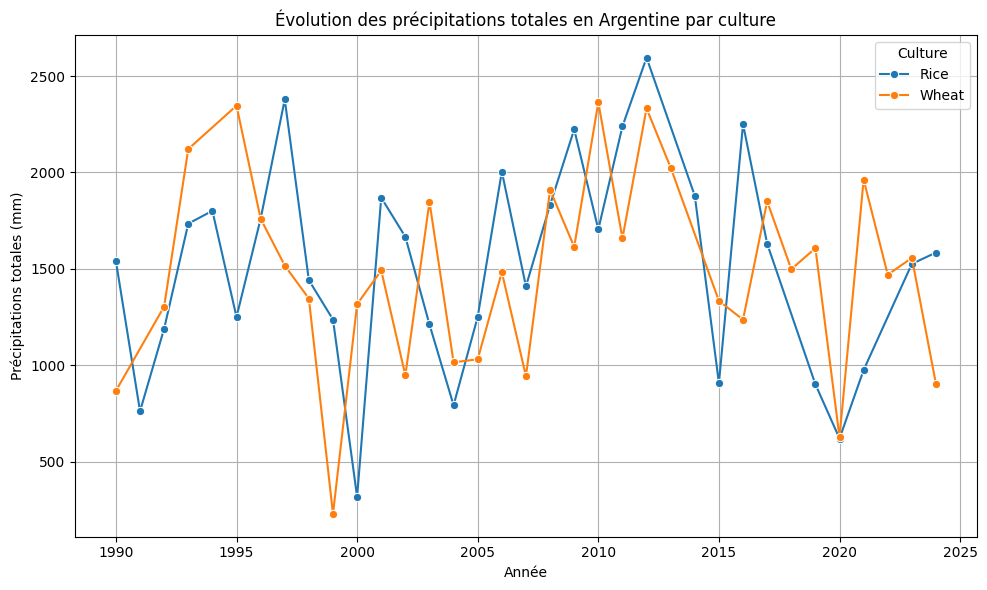

In [15]:
# Question 4: Create the graph of the total precipitation evolution over the years for each crop in Argentina

import matplotlib.pyplot as plt
import seaborn as sns

argentine = data_cleaned[data_cleaned['Country'] == 'Argentina']

plt.figure(figsize=(10, 6))
sns.lineplot(data=argentine, x='Year', y='Total_Precipitation', hue='Crop_Type', marker='o')

plt.title("Évolution des précipitations totales en Argentine par culture")
plt.xlabel("Année")
plt.ylabel("Précipitations totales (mm)")
plt.legend(title="Culture")
plt.grid(True)
plt.tight_layout()
plt.show()

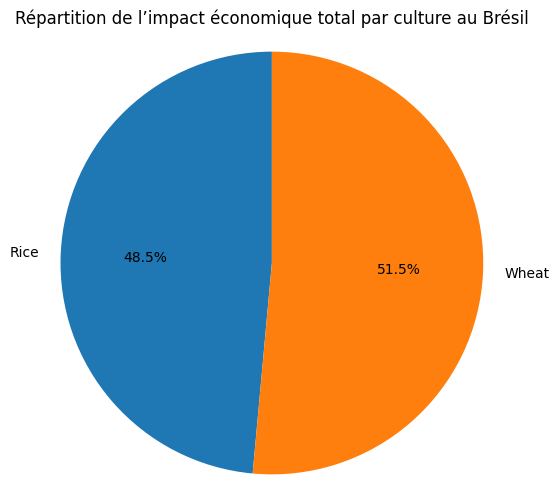

In [57]:
# Question 5: Create the pie chart that shows the percentage share of the totale economic impact for each crop in Brazil

bresil = data_cleaned[data_cleaned['Country'] == 'Brazil']

impact_par_culture = bresil.groupby('Crop_Type')['Economic_Impact'].sum()

plt.figure(figsize=(6, 6))
plt.pie(impact_par_culture, labels=impact_par_culture.index, autopct='%1.1f%%', startangle=90)
plt.title("Répartition de l’impact économique total par culture au Brésil")
plt.axis('equal')
plt.show()


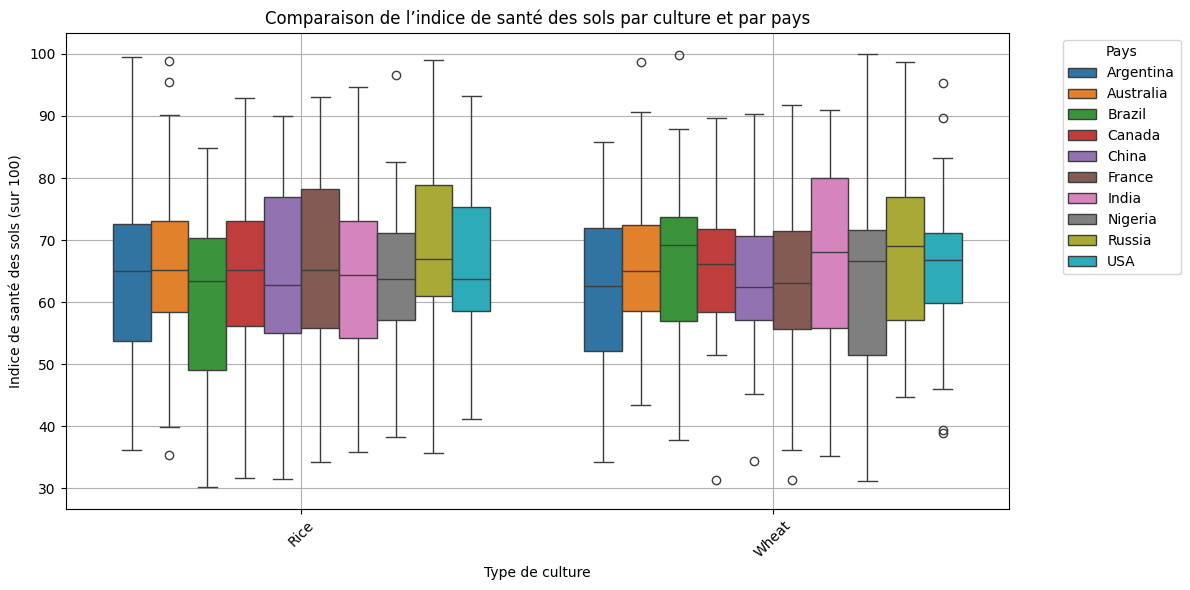

In [8]:
# Question 6: Create the boxplots that compare the soil health index across crops and all the countries

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=data_cleaned, x='Crop_Type', y='Soil_Health_Index', hue='Country')

plt.title("Comparaison de l’indice de santé des sols par culture et par pays")
plt.xlabel("Type de culture")
plt.ylabel("Indice de santé des sols (sur 100)")
plt.legend(title="Pays", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## Exercise 3: Clustering

SerriFleur aims to classify countries based on their farming practices in order to provide region-specific recommendations. You propose using unsupervised learning to identify distinct fertilizer usage profiles.

Your mission:



*   For each crop type, use agglomerative clustering on fertilizer usage with 4 clusters, euclidian distance metric and ward linkage
*   Analyze whether wheat and rice follow similar cluster pattern
*   Plot the dendrogram representation of fertilizer usage, for each crop type, with euclidian distance metric and average linkage


Groupe 0 : 129 observations
Groupe 1 : 126 observations
Groupe 2 : 34 observations
Groupe 3 : 44 observations


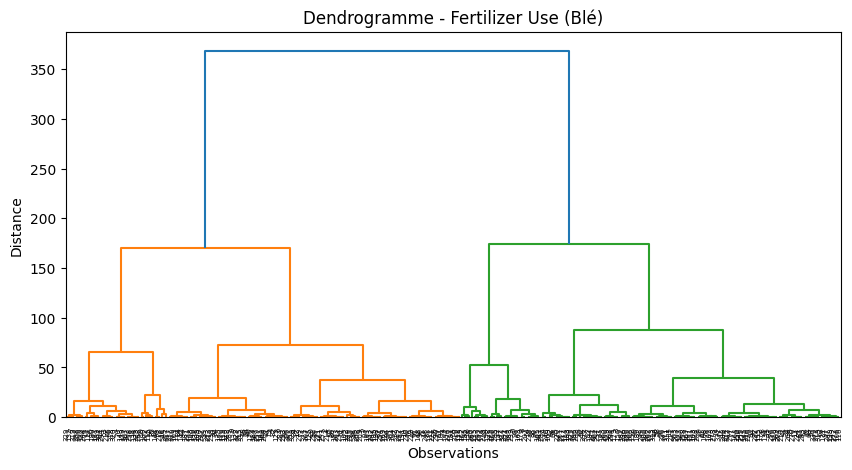

In [9]:
# Agglomerative Clustering for Wheat
# Question 7: Find the number of values in each clustering label
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import numpy as np

wheat = data_cleaned[data_cleaned['Crop_Type'] == 'Wheat']
X = wheat[['Fertilizer_Use']].dropna()

model = AgglomerativeClustering(n_clusters=4, linkage='ward')
labels = model.fit_predict(X)

for i in np.unique(labels):
    print(f"Groupe {i} : {(labels == i).sum()} observations")

# Dendrogramme avec la même méthode que le clustering
link = linkage(X, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(link)
plt.title("Dendrogramme - Fertilizer Use (Blé)")
plt.xlabel("Observations")
plt.ylabel("Distance")
plt.show()



Groupe 0 : 137 observations
Groupe 1 : 50 observations
Groupe 2 : 60 observations
Groupe 3 : 85 observations


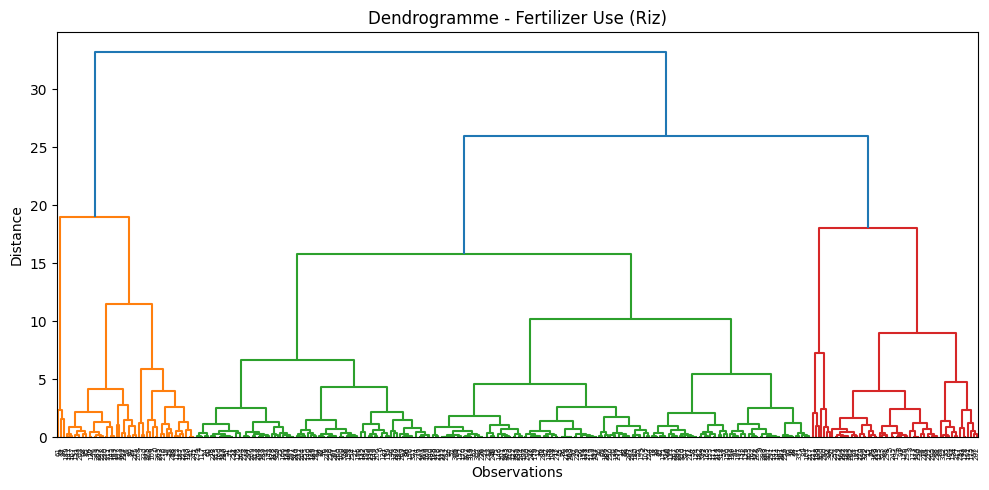

In [67]:
# Agglomerative Clustering for Rice
# Question 7: Find the number of values in each clustering label

rice = data_cleaned[data_cleaned['Crop_Type'] == 'Rice']
X_rice = rice[['Fertilizer_Use']].dropna()

model_rice = AgglomerativeClustering(n_clusters=4, linkage='ward')
labels_rice = model_rice.fit_predict(X_rice)

for i in np.unique(labels_rice):
    print(f"Groupe {i} : {(labels_rice == i).sum()} observations")

linkage_rice = linkage(X_rice, method='average')
plt.figure(figsize=(10, 5))
dendrogram(linkage_rice)
plt.title("Dendrogramme - Fertilizer Use (Riz)")
plt.xlabel("Observations")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

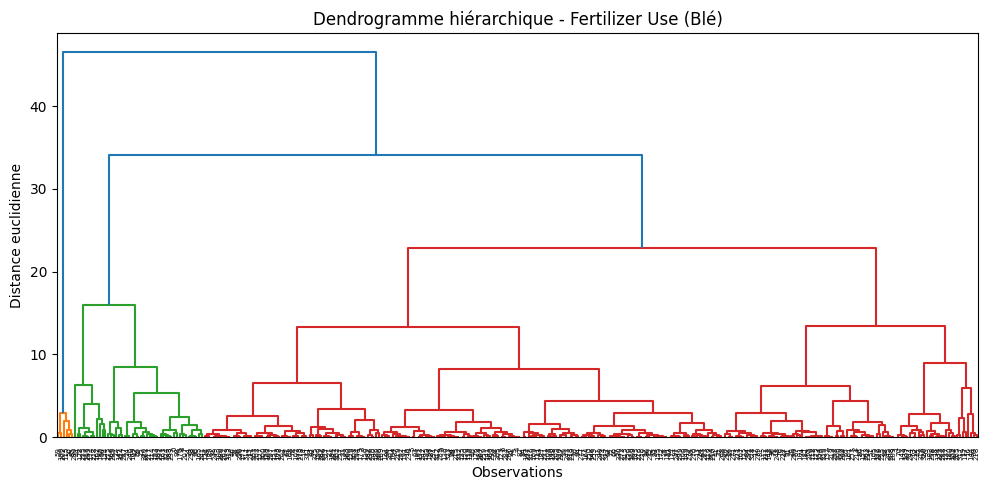

In [68]:
# Question 8: Hierarchical Clustering for Wheat
# Don't forget to reshape the values with numpy

import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

wheat = data_cleaned[data_cleaned['Crop_Type'] == 'Wheat']
fert_wheat = wheat['Fertilizer_Use'].dropna()

X_wheat = np.array(fert_wheat).reshape(-1, 1)

linkage_matrix = linkage(X_wheat, method='average', metric='euclidean')

plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title("Dendrogramme hiérarchique - Fertilizer Use (Blé)")
plt.xlabel("Observations")
plt.ylabel("Distance euclidienne")
plt.tight_layout()
plt.show()

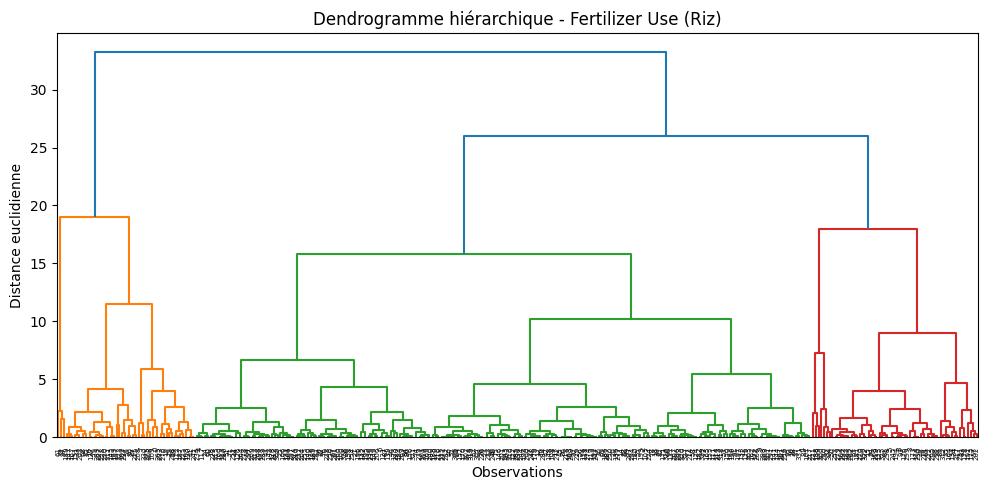

In [69]:
# Question 8: Hierarchical Clustering for Rice
# Don't forget to reshape the values with numpy

import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

rice = data_cleaned[data_cleaned['Crop_Type'] == 'Rice']
fert_rice = rice['Fertilizer_Use'].dropna()

X_rice = np.array(fert_rice).reshape(-1, 1)

linkage_matrix_rice = linkage(X_rice, method='average', metric='euclidean')

plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix_rice)
plt.title("Dendrogramme hiérarchique - Fertilizer Use (Riz)")
plt.xlabel("Observations")
plt.ylabel("Distance euclidienne")
plt.tight_layout()
plt.show()


## Exercise 4: Simple Linear Regression

A policymaker asks a simple question: "Does CO₂ have a measurable impact on crop yield for wheat and rice ?"
You decide to test this using a basic regression model.

Your mission:

*   Plot the heatmap of correlations for numeric columns only.
*   Model Crop_Yield as a function of CO2_Emissions (with `test_size = 0.3`, `random_state = 123` and `shuffle=True`).
*   Use MinMaxScaler and find the $R^2$, the MSE and the MAE.






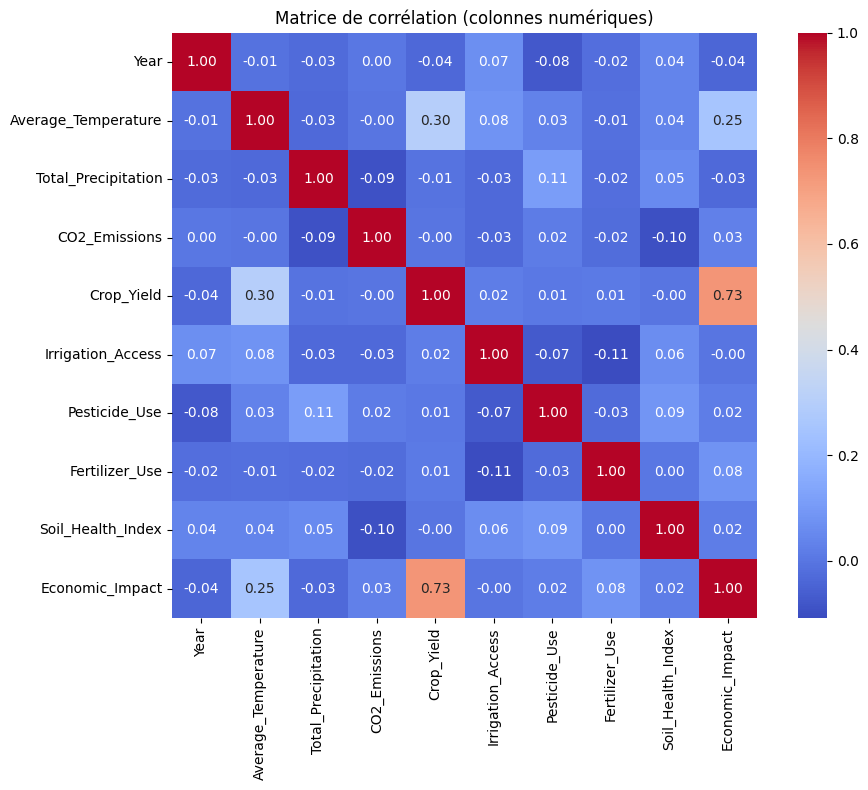

In [70]:
# Question 9: Plot heatmap of correlations

import seaborn as sns
import matplotlib.pyplot as plt

donnees_numeriques = data_cleaned.select_dtypes(include='number')

correlation_matrix = donnees_numeriques.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Matrice de corrélation (colonnes numériques)")
plt.tight_layout()
plt.show()


In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


filtered = data_cleaned[data_cleaned['Crop_Type'].isin(['Wheat', 'Rice'])]

X = filtered[['CO2_Emissions']]
y = filtered['Crop_Yield']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=123, shuffle=True
)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(" Résultats du modèle de régression (Wheat & Rice uniquement) :")
print(f"R²  : {r2:.4f}")
print(f"MSE : {mse:.4f}")
print(f"MAE : {mae:.4f}")





 Résultats du modèle de régression (Wheat & Rice uniquement) :
R²  : -0.0084
MSE : 0.4784
MAE : 0.5525


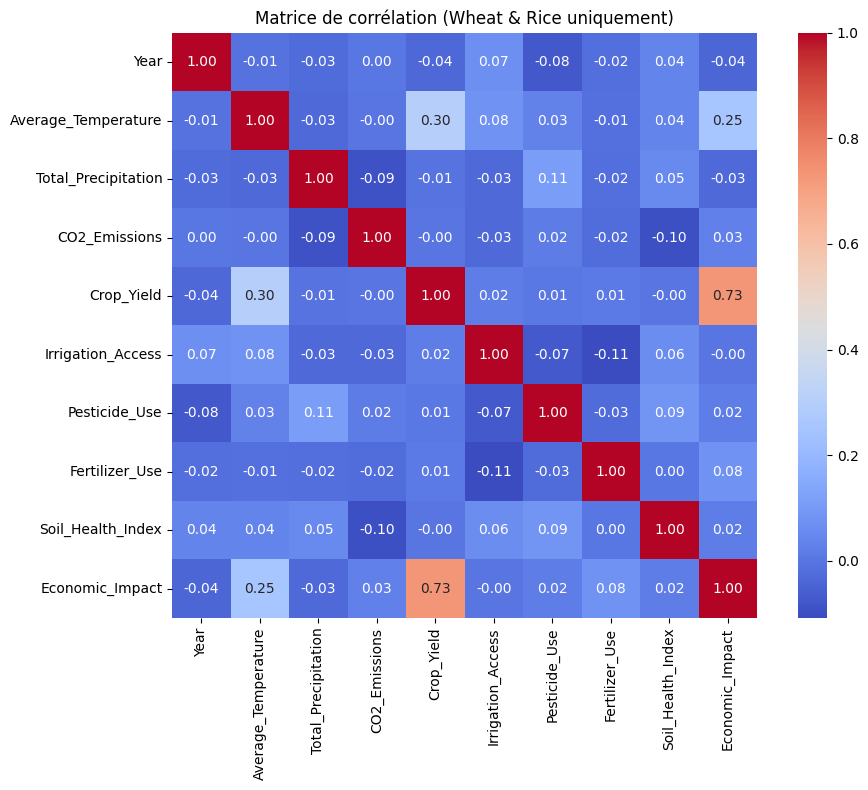

 Évaluation du modèle (Wheat & Rice uniquement) :
R² : -0.0084
MSE : 0.4784
MAE : 0.5525


In [86]:
# Split data into train and test sets

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

filtered = data_cleaned[data_cleaned['Crop_Type'].isin(['Wheat', 'Rice'])]

donnees_numeriques = filtered.select_dtypes(include='number')
plt.figure(figsize=(10, 8))
sns.heatmap(donnees_numeriques.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matrice de corrélation (Wheat & Rice uniquement)")
plt.tight_layout()
plt.show()

X = filtered[['CO2_Emissions']]
y = filtered['Crop_Yield']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.3,
    random_state=123,
    shuffle=True
)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(" Évaluation du modèle (Wheat & Rice uniquement) :")
print(f"R² : {r2:.4f}")
print(f"MSE : {mse:.4f}")
print(f"MAE : {mae:.4f}")



In [91]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

filtered = data_cleaned[data_cleaned['Crop_Type'].isin(['Wheat', 'Rice'])]

X = filtered[['CO2_Emissions']]
y = filtered['Crop_Yield']

print("Données CO2 avant scaling :")
print(X.head())

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

print("\n Données CO2 après scaling :")
print(pd.DataFrame(X_scaled, columns=['CO2_Emissions']).head())

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.3,
    random_state=123,
    shuffle=True
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\n Évaluation du modèle de régression linéaire (Wheat & Rice) :")
print(f"R² : {r2:.4f}")
print(f"MSE : {mse:.4f}")
print(f"MAE : {mae:.4f}")




Données CO2 avant scaling :
   CO2_Emissions
0      14.126667
1      18.350000
2      15.115000
3      19.710000
4      20.786667

 Données CO2 après scaling :
   CO2_Emissions
0       0.462209
1       0.605567
2       0.495757
3       0.651731
4       0.688278

 Évaluation du modèle de régression linéaire (Wheat & Rice) :
R² : -0.0084
MSE : 0.4784
MAE : 0.5525


In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = data_cleaned[['CO2_Emissions']]
y = data_cleaned['Crop_Yield']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.3,
    random_state=123,
    shuffle=True
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Évaluation du modèle de régression linéaire :")
print(f"R² : {r2:.4f}")
print(f"MSE : {mse:.4f}")
print(f"MAE : {mae:.4f}")






Évaluation du modèle de régression linéaire :
R² : -0.0084
MSE : 0.4784
MAE : 0.5525


In [92]:
# Question 10: Print out the R2, MSE and MAE score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Évaluation du modèle de régression :")
print(f"R² (coefficient de détermination) : {r2:.4f}")
print(f"MSE (erreur quadratique moyenne) : {mse:.4f}")
print(f"MAE (erreur absolue moyenne)     : {mae:.4f}")


Évaluation du modèle de régression :
R² (coefficient de détermination) : -0.0084
MSE (erreur quadratique moyenne) : 0.4784
MAE (erreur absolue moyenne)     : 0.5525


## Exercise 5: Multivariate Regression with Categorical Variables

Real-life relationships are rarely one-dimensional. You now create a new model to include all the other variables of the dataset, some of which are key climate factors.

Your mission:


*   Transform the column `Crop_Type` using `LabelEncoder`function and the column `Country` using `One-Hot` encoding
*   Build a multivariate regression model using all the variables to predict crop yield  (with `test_size = 0.3`, `random_state = 123` and `shuffle=True`)
*   Compare its performance with the previous model of part 4



In [82]:
# Seperate features and labels, and transform the columns Crop_Type and Country (don't forget to delete the old columns)

from sklearn.preprocessing import LabelEncoder

X = data_cleaned.drop(columns=['Crop_Yield'])
y = data_cleaned['Crop_Yield']

le = LabelEncoder()
X['Crop_Type_Encoded'] = le.fit_transform(X['Crop_Type'])

X = pd.get_dummies(X, columns=['Country'], drop_first=True)

X = X.drop(columns=['Crop_Type'])
if 'Region' in X.columns:
    X = X.drop(columns=['Region'])

X.head()


,Year,Average_Temperature,Total_Precipitation,CO2_Emissions,Irrigation_Access,Pesticide_Use,Fertilizer_Use,Soil_Health_Index,Economic_Impact,Crop_Type_Encoded,Country_Australia,Country_Brazil,Country_Canada,Country_China,Country_France,Country_India,Country_Nigeria,Country_Russia,Country_USA
0,1990,25.2500,1540.486667,14.126667,58.413333,42.223333,18.710000,72.513333,618.393333,0,False,False,False,False,False,False,False,False,False
1,1990,10.7550,867.305000,18.350000,39.830000,16.875000,75.195000,75.215000,650.170000,1,False,False,False,False,False,False,False,False,False
2,1991,14.3175,761.692500,15.115000,42.930000,29.302500,59.152500,59.955000,749.937500,0,False,False,False,False,False,False,False,False,False
3,1992,14.8650,1190.220000,19.710000,57.740000,33.495000,54.680000,40.260000,1190.750000,0,False,False,False,False,False,False,False,False,False
4,1992,27.5200,1304.713333,20.786667,78.210000,30.903333,25.186667,53.616667,581.710000,1,False,False,False,False,False,False,False,False,False


In [94]:
# Split data into train and test sets, create linear regression model and fit into the training data

model = LinearRegression()
model.fit(X_train, y_train)

print("Modèle de régression entraîné avec succès.")

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² : {r2:.4f}")
print(f"MSE : {mse:.4f}")
print(f"MAE : {mae:.4f}")



Modèle de régression entraîné avec succès.
R² : -0.0084
MSE : 0.4784
MAE : 0.5525


In [95]:
# Question 11: Print out the R2, MSE and MAE score

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import pandas as pd

X = data_cleaned.drop(columns=['Crop_Yield'])
y = data_cleaned['Crop_Yield']

le = LabelEncoder()
X['Crop_Type_Encoded'] = le.fit_transform(X['Crop_Type'])

X = pd.get_dummies(X, columns=['Country'], drop_first=True)

X = X.drop(columns=['Crop_Type'])
if 'Region' in X.columns:
    X = X.drop(columns=['Region'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123, shuffle=True
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(" Évaluation du modèle multivarié :")
print(f"R² : {r2:.4f}")
print(f"MSE : {mse:.4f}")
print(f"MAE : {mae:.4f}")


 Évaluation du modèle multivarié :
R² : 0.5377
MSE : 0.2193
MAE : 0.3779


# Part 2: Association Rules - Turn movies ratings into bussiness insights!

Lights, Camera, Data!

Are you a movie fan? I bet you are! Have you ever wondered how streaming platforms like Netflix seem to know exactly which movie you'll love next? You might have heard that they use recommendation algorithms and wondered how they work.

In this assignment, you'll explore how **association rules** can be used to develop a simple recommendation algorithm. The idea is simple: by analyzing which movies are frequently watched together, we can uncover patterns and use these insights to suggest movies based on a user's viewing history.

Now, let's dive in and make it happen!

## Exercise 1: Data Processing

We will use a subset of MoviesLens dataset, which consists of user ratings for a list of movies and information about the movies themselves (i.e., title and genres).

First, you need to load the ratings data from the URL below, and try to print out the size of the dataset, the number of users who provided ratings, and the number of movies that have been rated.

URL = "https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/refs/heads/master/data/ml/ratings.csv"

The `ratings` dataset contains four columns:

- `userID`: The ID of the user.
- `movieID`: The ID of the movie being rated.
- `rating`: The rating given by the user for the corresponding movie.
- `timestamp`: The timestamp when the rating was recorded.

In [97]:
import pandas as pd

df_ratings = pd.read_csv("https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/refs/heads/master/data/ml/ratings.csv")





In [23]:
# Print the first 5 rows of the dataframe

df_ratings = pd.read_csv("https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/refs/heads/master/data/ml/ratings.csv")


print(df_ratings.head())

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [25]:
# Print the shape of the dataframe

import pandas as pd

url = "https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/refs/heads/master/data/ml/ratings.csv"
ratings = pd.read_csv(url)

print(ratings.shape)



(100836, 4)


In [98]:
# Print the number of ratings available

import pandas as pd

df_ratings = pd.read_csv("https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/refs/heads/master/data/ml/ratings.csv")

print("\nNombre total de ratings disponibles :", len(df_ratings))



Nombre total de ratings disponibles : 100836


In [99]:
# Print the number of users who provided ratings

import pandas as pd

df_ratings = pd.read_csv("https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/refs/heads/master/data/ml/ratings.csv")



print("Nombre d'utilisateurs ayant fourni des ratings :", df_ratings['userId'].nunique())


Nombre d'utilisateurs ayant fourni des ratings : 610


In [100]:
# Print the number of movies have been rated

import pandas as pd

df_ratings = pd.read_csv("https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/refs/heads/master/data/ml/ratings.csv")


print("Nombre de films qui ont été notés :", df_ratings['movieId'].nunique())


Nombre de films qui ont été notés : 9724


[texte du lien](https://)Now, we need to transform the dataset into a matrix of size `n_users` × `n_movies`, where each row represents a user's ratings for all movies. If a user has not rated a movie, the rating will be 0.

To create this matrix, we will use the `pivot` function from pandas.

In [ ]:
df_ratings_pivot = df_ratings.pivot(index='userId', columns='movieId', values='rating')
df_ratings_pivot.head()

You can see that there are a lot of NaN values because each user rates only a subset of movies (those they have watched). We need to fill these NaN values with 0s.

In [ ]:
# Replace NaN values with 0
df_ratings_pivot.fillna(0, inplace=True)
df_ratings_pivot.head()

Next, we don’t just want to identify movies that are frequently watched together—we want to focus on the ones that people actually enjoy. To do this, we'll consider a rating of 3 or higher as an indicator that a viewer liked the movie.

Therefore, we need to map ratings ≥ 3 to `True` (liked) and ratings below 3 to `False` (not liked).

In [ ]:
df_ratings_pivot = df_ratings_pivot.map(lambda x: True if x >= 3 else False)
df_ratings_pivot.head()

Now, we are ready to apply the association rules!!

## Exercise 2: Association Rules



We will apply the **Apriori algorithm** to identify interesting association rules.

First, we need to find the frequent itemsets using the following configurations:

`min_support = 0.1`
`max_len = 2`

In [96]:
# Find the frequent itemsets

import pandas as pd
from mlxtend.frequent_patterns import apriori

df_ratings = pd.read_csv("https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/refs/heads/master/data/ml/ratings.csv")

df_ratings_pivot = df_ratings.pivot(index='userId', columns='movieId', values='rating')

df_ratings_pivot.fillna(0, inplace=True)

df_ratings_bool = df_ratings_pivot.map(lambda x: True if x >= 3 else False)

frequent_itemsets = apriori(
    df_ratings_bool,
    min_support=0.1,
    use_colnames=True,
    max_len=2
)

print("Frequent Itemsets (support ≥ 10%) :")
print(frequent_itemsets.head())





Frequent Itemsets (support ≥ 10%) :
    support itemsets
0  0.326230      (1)
1  0.145902      (2)
2  0.162295      (6)
3  0.193443     (10)
4  0.122951     (16)


In [97]:
# Question 12: Find the number of itemsets

nb_itemsets = frequent_itemsets.shape[0]
print("Nombre total d’itemsets fréquents trouvés :", nb_itemsets)

Nombre total d’itemsets fréquents trouvés : 2929


Now, we will mine the association rules from the frequent itemsets found above using `metric='lift'` and `min_threshold=1`.

In [33]:
# Find association rules
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

df = pd.read_csv("https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/refs/heads/master/data/ml/ratings.csv")
pivot = df.pivot(index='userId', columns='movieId', values='rating').fillna(0)
binary = pivot >= 3

itemsets = apriori(binary, min_support=0.1, use_colnames=True, max_len=2)

rules = association_rules(itemsets, metric='lift', min_threshold=1)

print(" Itemsets fréquents :")
print(itemsets.head())
print("Règles d'association :")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())



 Itemsets fréquents :
    support itemsets
0  0.326230      (1)
1  0.145902      (2)
2  0.162295      (6)
3  0.193443     (10)
4  0.122951     (16)
Règles d'association :
  antecedents consequents   support  confidence      lift
0        (32)         (1)  0.150820    0.538012  1.649182
1         (1)        (32)  0.150820    0.462312  1.649182
2         (1)        (34)  0.111475    0.341709  2.004252
3        (34)         (1)  0.111475    0.653846  2.004252
4         (1)        (47)  0.132787    0.407035  1.299955


Now, let's map the movie IDs with their titles so we can identify them.

First, let's load the `movies` dataset from this URL: "https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/refs/heads/master/data/ml/ratings.csv"

You will see that the `movies` dataset has 3 columns:
- `movieID`: The ID of the movie.
- `title`: The title of the movie.
- `genres`: The genres of the movie.

In [ ]:
df_movies = pd.read_csv("https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/refs/heads/master/data/ml/movies.csv")
df_movies.head()

In the following cell, we provide the code to map movie IDs with their titles. We assume that you are using the variable `rules` to store the association rules. If you used a different variable name, please update the code accordingly.

In [ ]:
def get_movie_name(movie_id):
    return df_movies[df_movies['movieId'] == movie_id]['title'].values[0]

In [ ]:
# Map antecedents and consequents with movie names
rules['antecedents'] = rules['antecedents'].apply(lambda x: get_movie_name(list(x)[0]))
rules['consequents'] = rules['consequents'].apply(lambda x: get_movie_name(list(x)[0]))
rules.head()

Now, we are ready to find out the most interesting association rules (i.e a pair of movies that are watched together) in term of the `lift` metric

In [99]:
# Question 13: Find the most interesting rule

import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

df_ratings = pd.read_csv("https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/refs/heads/master/data/ml/ratings.csv")
df_movies = pd.read_csv("https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/refs/heads/master/data/ml/movies.csv")

pivot = df_ratings.pivot(index='userId', columns='movieId', values='rating').fillna(0)
pivot_bool = pivot >= 3

itemsets = apriori(pivot_bool, min_support=0.1, use_colnames=True, max_len=2)
rules = association_rules(itemsets, metric='lift', min_threshold=1)

id_to_title = dict(zip(df_movies.movieId, df_movies.title))
rules['antecedents'] = rules['antecedents'].apply(lambda x: id_to_title[list(x)[0]])
rules['consequents'] = rules['consequents'].apply(lambda x: id_to_title[list(x)[0]])

top_rule = rules.sort_values('lift', ascending=False).head(1)
print("Règle la plus intéressante :")
print(top_rule[['antecedents', 'consequents', 'support', 'confidence', 'lift']])



Règle la plus intéressante :
                                          antecedents  \
5166  Harry Potter and the Prisoner of Azkaban (2004)   

                                         consequents   support  confidence  \
5166  Harry Potter and the Chamber of Secrets (2002)  0.106557    0.747126   

          lift  
5166  5.238473  


In [110]:
# Question 14: Find the movie that is the most frequently watched together with "Beauty and the beast (1991)"

target = "Beauty and the Beast (1991)"

# Filtrer les règles contenant le film dans antecedents ou consequents
beauty_rules = rules[
    rules['antecedents'].apply(lambda x: target in x) |
    rules['consequents'].apply(lambda x: target in x)
]

if not beauty_rules.empty:
    best_rule = beauty_rules.sort_values(by='lift', ascending=False).iloc[0]

    if target in best_rule['antecedents']:
        associated = list(best_rule['consequents'])[0]
    else:
        associated = list(best_rule['antecedents'])[0]

    print(f" Le film le plus fréquemment vu avec '{target}' est : {associated}")
else:
    print(" Aucune règle d'association trouvée pour ce film.")











 Le film le plus fréquemment vu avec 'Beauty and the Beast (1991)' est : A


# Part 3: Binary Classification

You are working at a leading Tour & Travel Company, and there’s trouble on the horizon — some customers are slipping away, never to book again! Your job is to predict which customers are at risk of churning and help the company keep them engaged.

Using historical customer data, you’ll use binary classification algorithms to identify potential churners before they disappear.

First, you need to load the dataset from this URL: "https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/refs/heads/master/data/travel.csv"

The dataset consists of following columns:
- `Age`: Age of customer.
- `FrequentFlyer`: Whether the customer takes frequent flights.
- `AnnualIncomeClass`: Class of the customer's annual income.
- `ServicesOpted`: Number of times services opted during recent years.
- `AccountSyncedToSocialMedia`: Whether company account of the user is synchronised to their social media.
- `BookedHotelOrNot`: Whether the customer books hotels using company services.
- `Target`: Whether the customer is a churner (1 for yes, 0 for no).

Try to print out the number of samples available in the dataset and types of each columns.

In [17]:



import pandas as pd

df_travel = pd.read_csv("https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/refs/heads/master/data/travel.csv")




In [42]:
# Print the first 5 rows

import pandas as pd

# 1. Charger les données
df_travel = pd.read_csv("https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/refs/heads/master/data/travel.csv")

# 2. Afficher les 5 premières lignes
print("Aperçu des 5 premières lignes :")
print(df_travel.head())





Aperçu des 5 premières lignes :
   Age FrequentFlyer AnnualIncomeClass  ServicesOpted  \
0   36            No     Middle Income              6   
1   34           Yes        Low Income              5   
2   37            No     Middle Income              3   
3   30            No     Middle Income              2   
4   30            No        Low Income              1   

  AccountSyncedToSocialMedia BookedHotelOrNot  Target  
0                         No              Yes       0  
1                        Yes               No       1  
2                        Yes               No       0  
3                         No               No       0  
4                         No               No       0  


In [20]:
# Print the number of samples in the dataset

import pandas as pd

df_travel = pd.read_csv("https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/refs/heads/master/data/travel.csv")



print("Nombre de clients dans le dataset :", df_travel.shape[0])




Nombre de clients dans le dataset : 960


In [21]:
# Print the column types

import pandas as pd

df_travel = pd.read_csv("https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/refs/heads/master/data/travel.csv")


print("\nTypes de données par colonne :")
print(df_travel.dtypes)



Types de données par colonne :
Age                            int64
FrequentFlyer                 object
AnnualIncomeClass             object
ServicesOpted                  int64
AccountSyncedToSocialMedia    object
BookedHotelOrNot              object
Target                         int64
dtype: object


## Exercise 1: Preprocess


First, we want to convert the columns with an object data type to
a **categorical** one and visualize the correlation heatmap of the dataset's features.

In [ ]:
for col in df_travel.select_dtypes(include=['object']).columns:
    df_travel[col] = pd.Categorical(df_travel[col]).codes

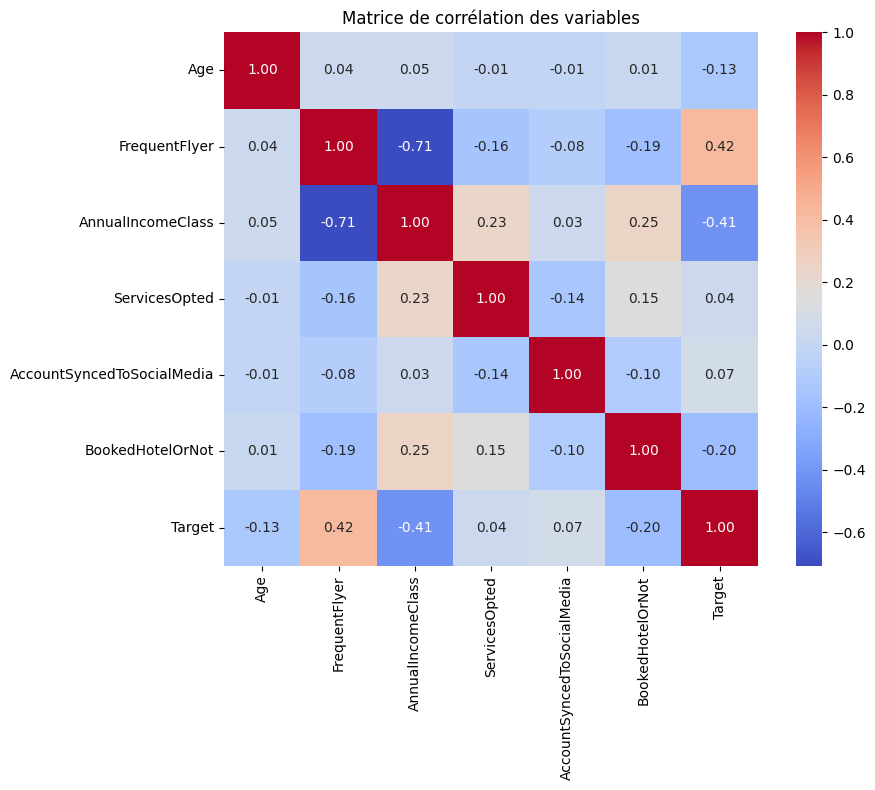

In [47]:
# Question 15: Plot heatmap of correlations

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_travel = pd.read_csv("https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/refs/heads/master/data/travel.csv")

for col in df_travel.select_dtypes(include=['object']).columns:
    df_travel[col] = pd.Categorical(df_travel[col]).codes

corr_matrix = df_travel.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matrice de corrélation des variables")
plt.tight_layout()
plt.show()




Now, let's separate the dataset into features (X) and labels (y). Then, split the data into train and test sets using `train_test_split` function from Sklearn with `test_size=0.2`, `random_state=42`, and set `stratify=y` to preserve the label distribution in both sets.

In [50]:
# Seperate the dataset into features and labels

from sklearn.model_selection import train_test_split

X = df_travel.drop(columns=['Target'])
y = df_travel['Target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Dimensions des jeux de données :")
print(f"X_train : {X_train.shape}, X_test : {X_test.shape}")
print(f"y_train : {y_train.shape}, y_test : {y_test.shape}")


Dimensions des jeux de données :
X_train : (768, 6), X_test : (192, 6)
y_train : (768,), y_test : (192,)


In [52]:
# Split into train and test sets

from sklearn.model_selection import train_test_split

# Séparer X et y (si pas déjà fait)
X = df_travel.drop(columns=['Target'])
y = df_travel['Target']

# Split avec stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Vérification des tailles
print("Données divisées :")
print(f"X_train shape : {X_train.shape}")
print(f"X_test shape  : {X_test.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"y_test shape  : {y_test.shape}")


Données divisées :
X_train shape : (768, 6)
X_test shape  : (192, 6)
y_train shape : (768,)
y_test shape  : (192,)


Before building any model, it's useful to establish a simple reference point. Imagine predicting the most frequent class for every single observation—no learning, just repetition. The accuracy you'd get from that naive approach is called the baseline accuracy. It’s the minimum benchmark any meaningful model should aim to outperform.

In [53]:
# Question 16: Calculate baseline accuracy

from sklearn.metrics import accuracy_score
import numpy as np

# Trouver la classe majoritaire dans y_train
most_frequent_class = y_train.mode()[0]

# Prédire cette classe pour toutes les valeurs de y_test
y_baseline_pred = np.full_like(y_test, fill_value=most_frequent_class)

# Calcul de la baseline accuracy
baseline_accuracy = accuracy_score(y_test, y_baseline_pred)

print(f"📉 Baseline accuracy (prédire toujours {most_frequent_class}) : {baseline_accuracy:.4f}")


📉 Baseline accuracy (prédire toujours 0) : 0.7656


Now, let's standardize the features using `StandardScaler` from Sklearn.




In [55]:
# Standardise features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

print("Standardisation terminée.")
print("Exemple (1ère ligne de X_train_scaled) :", X_train_scaled[0])


Standardisation terminée.
Exemple (1ère ligne de X_train_scaled) : [-0.60766853 -0.73173507  1.04361424 -0.25110486 -0.77459667  1.2662503 ]


## Exercise 2: Logistic regression

First, try use logistic regression for use our data. Use LogisticRegression with the following setting:
`penalty='l2', solver='lbfgs', max_iter=1000, random_state=30`

In [57]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression(
    penalty='l2',
    solver='lbfgs',
    max_iter=1000,
    random_state=30
)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy de la régression logistique : {accuracy:.4f}")

print("Rapport de classification :")
print(classification_report(y_test, y_pred))

print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))


Accuracy de la régression logistique : 0.8542
Rapport de classification :
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       147
           1       0.81      0.49      0.61        45

    accuracy                           0.85       192
   macro avg       0.84      0.73      0.76       192
weighted avg       0.85      0.85      0.84       192

Matrice de confusion :
[[142   5]
 [ 23  22]]


In [59]:
# Question 17: Find the test accuracy

from sklearn.metrics import accuracy_score

# Calcul de l'accuracy sur le test set
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Test accuracy : {test_accuracy:.4f}")


Test accuracy : 0.8542


Next, train a logistic regression classifier with cross-validation. Use 5 folds and 9 values in the logscale between $10^{-4}$ and $10^4$ for the regularizer parameter. For the rest of the arguments, we use the same values as we used for the logistic regression with no cross validation.

__Important:__ Set the following values for the arguments:
`
penalty='l2', solver='lbfgs', max_iter=1000, random_state=42, cv=4, Cs=*9*
`

In [61]:
# Train a logistic regression classifier with cross-validation

from sklearn.linear_model import LogisticRegressionCV
import numpy as np

C_values = np.logspace(-4, 4, 9)

logreg_cv = LogisticRegressionCV(
    Cs=C_values,
    cv=4,
    penalty='l2',
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)

logreg_cv.fit(X_train_scaled, y_train)

y_cv_pred = logreg_cv.predict(X_test_scaled)

from sklearn.metrics import accuracy_score
cv_accuracy = accuracy_score(y_test, y_cv_pred)
print(f"Accuracy avec validation croisée : {cv_accuracy:.4f}")


Accuracy avec validation croisée : 0.8542


In [66]:
# Question 18: Find the value of the regularization parameter and the test accuracy

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score

df_travel = pd.read_csv("https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/refs/heads/master/data/travel.csv")

for col in df_travel.select_dtypes(include=['object']).columns:
    df_travel[col] = pd.Categorical(df_travel[col]).codes

X = df_travel.drop(columns=['Target'])
y = df_travel['Target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C_values = np.logspace(-4, 4, 5)
logreg_cv = LogisticRegressionCV(
    Cs=C_values,
    cv=3,
    penalty='l2',
    solver='lbfgs',
    max_iter=300,
    random_state=42
)
logreg_cv.fit(X_train_scaled, y_train)

y_cv_pred = logreg_cv.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_cv_pred)
best_C = logreg_cv.C_[0]

print(f" Meilleur C trouvé : {best_C}")
print(f" Accuracy sur test set : {accuracy:.4f}")



 Meilleur C trouvé : 1.0
 Accuracy sur test set : 0.8542


## Exercise 3: KNN classifier

Use the KNeighborClassifier from sklearn using the following setting:
`n_neighbors=7, p=2, weights='uniform', algorithm="kd_tree"`

In [69]:
# KNeighborClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

knn = KNeighborsClassifier(
    n_neighbors=7,
    p=2,
    weights='uniform',
    algorithm='kd_tree'
)


knn.fit(X_train_scaled, y_train)

y_knn_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_knn_pred)
print(f"Accuracy KNN (k=7) : {accuracy:.4f}")

print("Rapport de classification KNN :")
print(classification_report(y_test, y_knn_pred))

print("Matrice de confusion KNN :")
print(confusion_matrix(y_test, y_knn_pred))


Accuracy KNN (k=7) : 0.8698
Rapport de classification KNN :
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       147
           1       0.83      0.56      0.67        45

    accuracy                           0.87       192
   macro avg       0.85      0.76      0.79       192
weighted avg       0.87      0.87      0.86       192

Matrice de confusion KNN :
[[142   5]
 [ 20  25]]


Use `GridSearchCV` to find the best hyper-parameters for your KNN model. Use values between 1 and 10 for `n_neighbors` argument and use either 'uniform' or 'distance' for the `weights` argument. Use a 5-fold cross validation. This translate to the following values for the arguments of the `GridSearchCV`:
```
param_grid={"n_neighbors": range(1, 11), "weights":["uniform", "distance"]}, cv=5
```

In [70]:
# Question 19: Find the accuracy of the best KNN model

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

param_grid = {
    "n_neighbors": range(1, 11),
    "weights": ["uniform", "distance"]
}

knn = KNeighborsClassifier(algorithm='kd_tree', p=2)

grid = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)

grid.fit(X_train_scaled, y_train)

best_knn = grid.best_estimator_
y_knn_best_pred = best_knn.predict(X_test_scaled)

knn_best_acc = accuracy_score(y_test, y_knn_best_pred)

print(f"Meilleure configuration KNN : {grid.best_params_}")
print(f"Accuracy du meilleur KNN sur test set : {knn_best_acc:.4f}")


Meilleure configuration KNN : {'n_neighbors': 3, 'weights': 'distance'}
Accuracy du meilleur KNN sur test set : 0.8698


In [72]:
# Question 20: Find the 'n_neighbors' and 'weights' values for the best KNN model

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

df_travel = pd.read_csv("https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/refs/heads/master/data/travel.csv")

for col in df_travel.select_dtypes(include=['object']).columns:
    df_travel[col] = pd.Categorical(df_travel[col]).codes

X = df_travel.drop(columns=['Target'])
y = df_travel['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    "n_neighbors": range(1, 11),
    "weights": ["uniform", "distance"]
}

knn = KNeighborsClassifier(algorithm='kd_tree', p=2)
grid = GridSearchCV(knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

best_params = grid.best_params_
print("Meilleurs hyperparamètres du modèle KNN :")
print(f"n_neighbors : {best_params['n_neighbors']}")
print(f"weights     : {best_params['weights']}")

y_pred = grid.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy du meilleur modèle KNN : {accuracy:.4f}")


Meilleurs hyperparamètres du modèle KNN :
n_neighbors : 3
weights     : distance
Accuracy du meilleur modèle KNN : 0.8698


## Exercise 4: Decision Tree

*Train* a Decision Tree classifier on the training data. Use the following values for the arguments of the decision tree:
```
criterion="gini", max_depth=3, random_state=30
```

In [76]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Initialiser le classifieur
tree = DecisionTreeClassifier(
    criterion="gini",
    max_depth=3,
    random_state=30
)

# 2. Entraîner sur les données standardisées
tree.fit(X_train_scaled, y_train)

# 3. Prédictions sur le test set
y_tree_pred = tree.predict(X_test_scaled)

# 4. Évaluation
accuracy = accuracy_score(y_test, y_tree_pred)
print(f" Accuracy Decision Tree : {accuracy:.4f}")

# 5. Rapport complet
print("\n Rapport de classification (Decision Tree) :")
print(classification_report(y_test, y_tree_pred))

print("\n Matrice de confusion :")
print(confusion_matrix(y_test, y_tree_pred))


 Accuracy Decision Tree : 0.8542

 Rapport de classification (Decision Tree) :
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       147
           1       0.76      0.56      0.64        45

    accuracy                           0.85       192
   macro avg       0.82      0.75      0.77       192
weighted avg       0.85      0.85      0.85       192


 Matrice de confusion :
[[139   8]
 [ 20  25]]


Use `GridSearchCV` to find the best hyper-parameters for your decision tree model. Use values between 1 and 7 for `max_depth` argument and use either 'gini' or 'entropy' for the `criterion` argument. Use a 5-fold cross validation. This translate to the following values for the arguments of the `GridSearchCV`:
```
param_grid={"max_depth": range(1, 8), "criterion":["gini", "entropy"]}, cv=5
```

In [78]:
# Question 21: Find the accuracy of the best decision tree model

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Charger les données
df_travel = pd.read_csv("https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/refs/heads/master/data/travel.csv")

# Encodage
for col in df_travel.select_dtypes(include='object'):
    df_travel[col] = pd.Categorical(df_travel[col]).codes

# Séparer X et y
X = df_travel.drop(columns=["Target"])
y = df_travel["Target"]

# Split et standardisation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Définir la grille de recherche
param_grid = {
    "max_depth": range(1, 8),
    "criterion": ["gini", "entropy"]
}

# GridSearchCV avec arbre de décision
grid = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring="accuracy"
)

# Entraînement
grid.fit(X_train_scaled, y_train)

# Prédiction test
y_tree_best_pred = grid.predict(X_test_scaled)

# Accuracy
best_tree_accuracy = accuracy_score(y_test, y_tree_best_pred)
print(f" Accuracy du meilleur arbre de décision : {best_tree_accuracy:.4f}")


 Accuracy du meilleur arbre de décision : 0.8958


In [81]:
# Question 22: Find the 'criterion' and 'max_depth' values for the best decision tree model

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

df_travel = pd.read_csv("https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/refs/heads/master/data/travel.csv")

for col in df_travel.select_dtypes(include='object'):
    df_travel[col] = pd.Categorical(df_travel[col]).codes

X = df_travel.drop(columns=["Target"])
y = df_travel["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": range(1, 8)
}

grid = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring="accuracy"
)

grid.fit(X_train_scaled, y_train)

best_criterion = grid.best_params_['criterion']
best_max_depth = grid.best_params_['max_depth']

print("Meilleurs hyperparamètres pour le Decision Tree :")
print(f"criterion  : {best_criterion}")
print(f"max_depth  : {best_max_depth}")




Meilleurs hyperparamètres pour le Decision Tree :
criterion  : gini
max_depth  : 6


The company places a strong emphasis on keeping its customers and has solid resources dedicated to retention. In such a case, choosing the right evaluation metric becomes crucial. The answer lies in understanding what matters most in this context.


Question 23: Find the best metric for the company

> TODO: Your answer here

In [84]:
# Question 24: Find the model that gives the best result using the metric above

from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000, random_state=30)
logreg.fit(X_train_scaled, y_train)
y_pred_log = logreg.predict(X_test_scaled)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7, p=2, weights='uniform', algorithm='kd_tree')
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=30)
tree.fit(X_train_scaled, y_train)
y_pred_tree = tree.predict(X_test_scaled)

logistic_recall = classification_report(y_test, y_pred_log, output_dict=True)['1']['recall']
knn_recall = classification_report(y_test, y_pred_knn, output_dict=True)['1']['recall']
tree_recall = classification_report(y_test, y_pred_tree, output_dict=True)['1']['recall']

recalls = {
    'Logistic Regression': logistic_recall,
    'KNN': knn_recall,
    'Decision Tree': tree_recall
}

best_model = max(recalls, key=recalls.get)

print(" Recalls (churn = 1) par modèle :")
for model, recall in recalls.items():
    print(f"{model:<20} : {recall:.4f}")

print(f"\n Meilleur modèle basé sur le recall churn : {best_model}")



 Recalls (churn = 1) par modèle :
Logistic Regression  : 0.4889
KNN                  : 0.5556
Decision Tree        : 0.5556

 Meilleur modèle basé sur le recall churn : KNN
